<a href="https://colab.research.google.com/github/H12-25-L-Equipo-36/Hackaton-Flightdelay/blob/Data_science/complete_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Notebook En Collab](https://colab.research.google.com/drive/1j2yHUgoUbcANEVWlwOkoWcyTKN8VmJw7)

# 📊 DataSet Final

Se importa el data set con gdown por su alojamiento en la nube, ya que este se encuentra limpio sin datos que no son de utilidad para la explicación el analisis, separación de variables y utilizaremos este data set para el machine learning

In [ ]:
!pip install gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
gdown.download("https://drive.google.com/uc?id=1_8Uzy9vxZr8Vl1328jWufiw4NsK_XxjN","datafinal.csv", quiet=False)
df= pd.read_csv("datafinal.csv")


Downloading...
From (original): https://drive.google.com/uc?id=1_8Uzy9vxZr8Vl1328jWufiw4NsK_XxjN
From (redirected): https://drive.google.com/uc?id=1_8Uzy9vxZr8Vl1328jWufiw4NsK_XxjN&confirm=t&uuid=738785f6-8e45-46dc-8f6c-9e0731bddba5
To: /content/datafinal.csv
100%|██████████| 247M/247M [00:01<00:00, 209MB/s]


# Analisis sobre el problema

Todos los que viajan en avión —y especialmente las aerolíneas y aeropuertos— sufren con retrasos.

Estos retrasos causan insatisfacción en los pasajeros, costos extras para las empresas y problemas de logística (como conexiones perdidas y reajustes de vuelos).

El cliente quiere predecir, basándose en datos del vuelo (origen, destino, hora, aerolínea, etc.), cuál es la probabilidad de que el vuelo se retrase para prepararse con antelación:

Los pasajeros pueden recibir alertas antes de salir de casa.

Las aerolíneas pueden ajustar la operación y minimizar el impacto.

Los aeropuertos pueden planificar mejor el uso de la infraestructura.

In [ ]:
df.head()

,airline,day_of_week,origin,destination,time,delay,distance_mil,hour,distance_km,delays
0,CO,3,SFO,IAH,15.0,1.0,205,0.0,329.91,1
1,US,3,PHX,CLT,15.0,1.0,222,0.0,357.27,1
2,AA,3,LAX,DFW,20.0,1.0,165,0.0,265.54,1
3,AA,3,SFO,DFW,20.0,1.0,195,0.0,313.82,1
4,AS,3,ANC,SEA,30.0,0.0,202,0.0,325.09,0


In [ ]:
df[['hour', 'distance_km']].describe()

,hour,distance_km
count,5.788483e+06,5.788483e+06
mean,1.254504e+01,1.224462e+03
std,5.082359e+00,9.884597e+02
min,0.000000e+00,0.000000e+00
25%,8.000000e+00,4.908500e+02
50%,1.200000e+01,9.591700e+02
75%,1.700000e+01,1.630260e+03
max,2.400000e+01,8.019340e+03


# Interpretación del problema

Buscamos los datos que estan correlacionados para poder utilizarlos en el aprendizaje ML y estos datos tengan importan e impacto para que el ML muestre datos con mejor presición y dandoles un peso adecuado para su futura interacción gráficos los datos que evaluamos tanto el peso y su correlación con la variable delay, esto se hace con el fin de encontrar una correlación perfecta positiva, sin correlación y correlación negativa

In [ ]:
df.groupby('airline')['delays'].mean().std()

0.08605930250702883

In [ ]:
df.groupby('hour')['delays'].mean().sort_values()

,delays
hour,
5.0,0.149677
6.0,0.204683
7.0,0.252716
3.0,0.253821
4.0,0.270097
8.0,0.287448
9.0,0.334644
10.0,0.361841
11.0,0.382747


KeyboardInterrupt: 

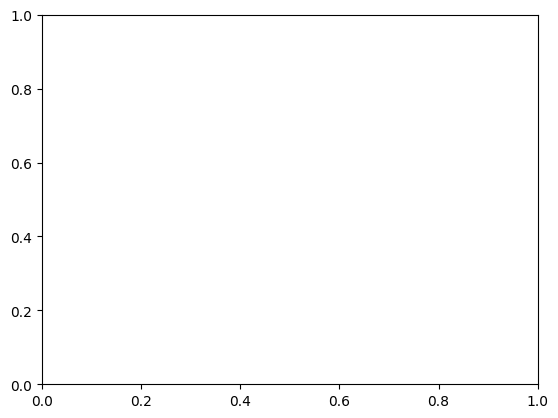

In [ ]:
sns.barplot(x='airline', y='delays', data=df , estimator='mean')

In [ ]:
sns.boxplot(x='delays', y='hour', data=df)

In [ ]:
sns.boxplot(x='delays', y='distance_km', data=df)

Este grafico muestra la media de la probabilidad de retraso del origen y del destino demostrando que estos datos no se correlacionan si hay retraso o no

In [ ]:
pivot = pd.pivot_table(df, values='delays', index='origin', columns='destination', aggfunc='mean' )
sns.heatmap(pivot, cmap='coolwarm')

In [ ]:
sns.violinplot(x='delays', y='day_of_week', data=df, inner="quartile")

En esta grafica de barras podemos visualizar que el dia de la semana con mayor promedio de delays es el jueves y el menor el sabado

In [ ]:
day_of_week_delays = df.groupby('day_of_week')['delays'].mean().sort_values(ascending=False)

day_names_map = {
    1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves',
    5: 'Viernes', 6: 'Sábado', 7: 'Domingo'
}
day_labels = [day_names_map[day] for day in day_of_week_delays.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_delays.values, y=day_labels, hue=day_labels, palette='Blues_d', legend=False)

plt.xlim(0.34, 0.42)

plt.xlabel("Probabilidad promedio de retraso")
plt.ylabel("Día de la semana")
plt.title("Retrasos promedio por día de la semana")

plt.tight_layout()
plt.show()

En esta grafica de violin se puede visualizar que a medida que va avanzando el dia hay mas probabilidades de retraso en los vuelos

In [ ]:
sns.violinplot(x='delays', y='hour', data=df, inner="quartile")

## Conclusiones

- Se **determino el peso y correlación** de cada una de las variables
- La variable de correlación alta positiva es la hora
- La variabale de correlación alta negativa es distancia
- Usaremos las columnas de hour y day_of_week para la obtener la fecha
- Separaremos los features de X como

"airline",

"origin",

"destination",

"distance_km",

"day_of_week",

"hour"

Usaremos la variable Y

"delays"

Iniciaremos el modelado de Machine Learning a partir de estos datos


# 🤖 Machine Learning inicio de Modelado

In [ ]:
features = [
    "airline",
    "origin",
    "destination",
    "distance_km",
    "day_of_week",
    "hour"
]
x = df[features]
y = df["delays"]


In [ ]:
print(x.shape)
print(y.shape)


(5788483, 6)
(5788483,)


In [ ]:
x.head()

,airline,origin,destination,distance_km,day_of_week,hour
0,CO,SFO,IAH,329.91,3,0.0
1,US,PHX,CLT,357.27,3,0.0
2,AA,LAX,DFW,265.54,3,0.0
3,AA,SFO,DFW,313.82,3,0.0
4,AS,ANC,SEA,325.09,3,0.0


In [ ]:
df_num=df.drop(["airline","origin","destination","time","distance_mil","delay"], axis=1)

In [ ]:
df_feat=df.drop(["time","distance_mil","distance_km","delays","delay","day_of_week","hour"], axis=1)

In [ ]:
df_feat.head()

,airline,origin,destination
0,CO,SFO,IAH
1,US,PHX,CLT
2,AA,LAX,DFW
3,AA,SFO,DFW
4,AS,ANC,SEA


In [ ]:
df_num.head()

In [ ]:
corr_num=df_num.corr()
corr_num

,day_of_week,hour,distance_km,delays
day_of_week,1.000000,0.004972,0.014271,-0.008490
hour,0.004972,1.000000,0.089150,0.198938
distance_km,0.014271,0.089150,1.000000,0.048191
delays,-0.008490,0.198938,0.048191,1.000000


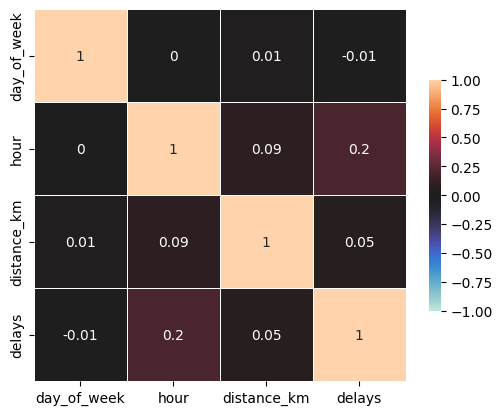

In [ ]:
fig, ax=plt.subplots(figsize=(6,6))
ax= sns.heatmap(np.round(corr_num,2),vmax=1, vmin=-1, center=0, square= True,
                linewidths=.5, annot=True, cbar_kws={"shrink":.5})

In [ ]:
categorical_features=["airline", "origin", "destination"]
numbers_features=["distance_km", "day_of_week", "hour"]

In [ ]:
categorical_features_df=df[categorical_features]
categorical_features_df.head()

,airline,origin,destination
0,CO,SFO,IAH
1,US,PHX,CLT
2,AA,LAX,DFW
3,AA,SFO,DFW
4,AS,ANC,SEA


In [ ]:
categorical_numbers_df=df[categorical_numbers]
categorical_numbers_df.head()

NameError: name 'categorical_numbers' is not defined

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
one_hot = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"),
         categorical_features),
        ("num", StandardScaler(), numbers_features)
    ]
)

In [ ]:
one_hot= ColumnTransformer(
   transformers=[("cat", OneHotEncoder(handle_unknown= "ignore"), categorical_features),
                 ("num","passthrough",numbers_features)
])


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model_lrg= Pipeline (steps=[("preprocess",one_hot),
                                 ("classfier",LogisticRegression(max_iter=2000,class_weight='balanced'))])

In [ ]:
model_lrg.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['airline', 'origin',
                                                   'destination']),
                                                 ('num', StandardScaler(),
                                                  ['distance_km', 'day_of_week',
                                                   'hour'])])),
                ('classfier',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4630786, 6)
(1157697, 6)
(4630786,)
(1157697,)


In [ ]:
y_pred= model_light.predict(x_train_small)

In [ ]:
result_lrg = val_cross(model_lrg, x_train, y_train)

In [ ]:
confidence_interval(result_lrg)

('Intervalo de confianza(test_recall): [ 0.611', ' 0.614]')

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_lrg= model_lrg.predict(x_test)
conf_mtx= confusion_matrix(y_test, y_predict_custom)
conf_mtx

array([[252247, 461294],
       [ 76922, 367234]])

In [ ]:
y_prob = model_lrg.predict_proba(x_test)[:,1]
y_predict_custom= (y_prob>=0.4).astype(int)

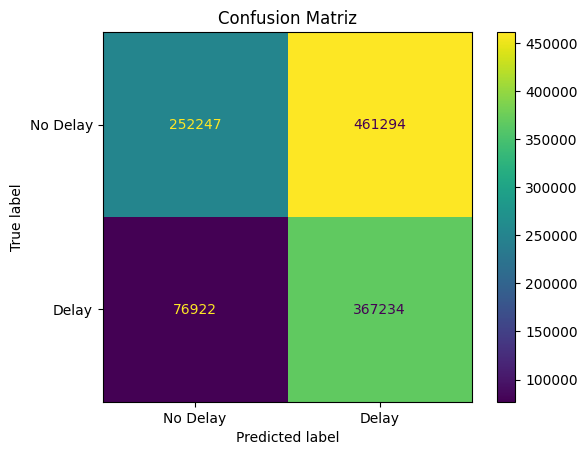

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_m = ConfusionMatrixDisplay(confusion_matrix=conf_mtx,
                           display_labels=["No Delay", "Delay"])
confusion_m.plot()
plt.title("Confusion Matriz")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

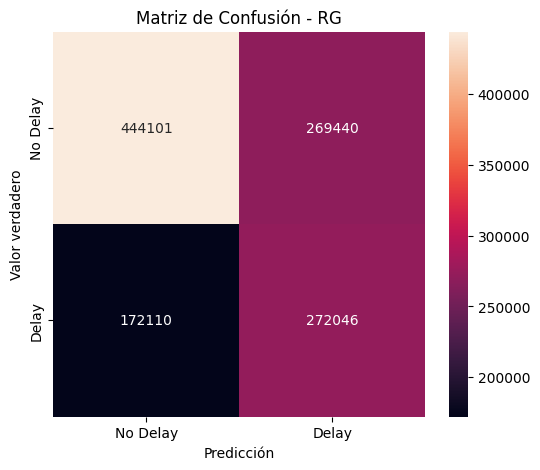

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(
    conf_mtx,
    annot=True,
    fmt='d',
    xticklabels=['No Delay','Delay'],
    yticklabels=['No Delay','Delay']
)
plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.title('Matriz de Confusión - RG')
plt.show

In [ ]:
from  sklearn.metrics import confusion_matrix
confusion_mtx= confusion_matrix(y_train_small, y_pred, normalize='true')
confusion_mtx


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,
                           display_labels=["No Delay", "Delay"])
cm.plot()
plt.title("Confusion Matriz")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_train_small, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Logistic Regression")
plt.legend()
plt.show()

NameError: name 'y_train_small' is not defined

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test, y_predict_custom)

array([[252247, 461294],
       [ 76922, 367234]])

In [ ]:
classification_report(y_test, y_predict_custom)

'              precision    recall  f1-score   support\n\n           0       0.77      0.35      0.48    713541\n           1       0.44      0.83      0.58    444156\n\n    accuracy                           0.54   1157697\n   macro avg       0.60      0.59      0.53   1157697\nweighted avg       0.64      0.54      0.52   1157697\n'

In [ ]:
from pandas.core.indexes.base import maybe_extract_name
from sklearn.model_selection import StratifiedKFold, cross_validate

def val_cross (model, x,y):
  skf= StratifiedKFold(n_splits=3,
                       shuffle=True,
                       random_state=785
                       )
  resultados= cross_validate(
      model,
      x,
      y,
      cv=skf,
      scoring=["precision","recall","accuracy","f1"],
      n_jobs= 1
  )
  return resultados

def confidence_interval(resultado, metrica="test_recall"):
  mean= resultado[metrica].mean()
  std= resultado[metrica].std()
  return(
      f'Intervalo de confianza({metrica}): '
      f'[{max(mean-2*std,0): .3f}',
      f'{min(mean+2*std,1): .3f}]'
  )



In [ ]:
from sklearn.metrics import recall_score
recall_train = recall_score(
y_train,(model_lrg.predict_proba(x_train)[:,1]>=0.4)
)
recall_test= recall_score(
y_test,(model_lrg.predict_proba(x_test)[:,1]>=0.4)
)
print(recall_train, recall_test)

0.8269656381991912 0.8268131017030053


In [ ]:
example= x_test.iloc[[0]]
model_lrg.predict_proba(example)

array([[0.28607459, 0.71392541]])

In [ ]:

model_lrg.predict_proba(x_test.tail(10))

array([[0.38930269, 0.61069731],
       [0.51374242, 0.48625758],
       [0.7255575 , 0.2744425 ],
       [0.39695476, 0.60304524],
       [0.21792786, 0.78207214],
       [0.56704944, 0.43295056],
       [0.59636049, 0.40363951],
       [0.33791546, 0.66208454],
       [0.4565637 , 0.5434363 ],
       [0.46604427, 0.53395573]])

In [ ]:
model_lrg.predict_proba(x_test.head(10))

array([[0.28607459, 0.71392541],
       [0.77134013, 0.22865987],
       [0.36928965, 0.63071035],
       [0.32331017, 0.67668983],
       [0.40460986, 0.59539014],
       [0.6271103 , 0.3728897 ],
       [0.5880993 , 0.4119007 ],
       [0.33610673, 0.66389327],
       [0.57401887, 0.42598113],
       [0.48126475, 0.51873525]])

In [ ]:
model_lrg.predict(x_test.iloc[:,:])

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
df.head()

,airline,day_of_week,origin,destination,time,delay,distance_mil,hour,distance_km,delays
0,CO,3,SFO,IAH,15.0,1.0,205,0.0,329.91,1
1,US,3,PHX,CLT,15.0,1.0,222,0.0,357.27,1
2,AA,3,LAX,DFW,20.0,1.0,165,0.0,265.54,1
3,AA,3,SFO,DFW,20.0,1.0,195,0.0,313.82,1
4,AS,3,ANC,SEA,30.0,0.0,202,0.0,325.09,0


In [ ]:
vuelo_pb1=pd.DataFrame([{
"airline": "AA",
"origin":"LAX",
"destination":"OLT",
"distance_km": 460,
"day_of_week": 3,
"hour": 8
}])

In [ ]:
vuelo_pb2=pd.DataFrame([{
"airline": "US",
"origin":"SFO",
"destination":"SEA",
"distance_km": 2000,
"day_of_week": 6,
"hour": 20
}])

In [ ]:

for i, vuelo in enumerate([vuelo_pb1,vuelo_pb2], start=1):
  prob= model_lrg.predict_proba(vuelo)[0,1]
  pred= int(prob >=0.4)
  print(f"Vuelo {i}: ")
  print(f"  La probabilidad de delay es: {prob: .2f}")
  print (f" Prediccion final: {'Delay' if pred else 'No Delay'}\n")

Vuelo 1: 
  La probabilidad de delay es:  0.30
 Prediccion final: No Delay

Vuelo 2: 
  La probabilidad de delay es:  0.62
 Prediccion final: Delay



In [ ]:
vuelo = {
    "airline": "US",
    "origin": "SFO",
    "destination": "SEA",
    "distance_km": 2000,
    "day_of_week": 6
}

In [ ]:
for hour in [3,6,10,14,19,23]:
  vuelo_prob = pd.DataFrame([{**vuelo, "hour": hour}])
  prob = model_lrg.predict_proba(vuelo_prob)[0,1]
  print(f"Hora: {hour}, Probabilidad de retraso: {prob:.2f}")

Hora: 3, Probabilidad de retraso: 0.28
Hora: 6, Probabilidad de retraso: 0.33
Hora: 10, Probabilidad de retraso: 0.41
Hora: 14, Probabilidad de retraso: 0.49
Hora: 19, Probabilidad de retraso: 0.60
Hora: 23, Probabilidad de retraso: 0.68


In [ ]:
model_lrg.score(x_test, y_test)

0.6185962302744155

In [ ]:
import joblib
joblib.dump(model_lrg, "predictor_delay.pkl")

['predictor_delay.pkl']

In [ ]:
import joblib
model = joblib.load('predictor_delay.pkl')

In [ ]:
model.score(x_test, y_test)

0.6185962302744155

In [ ]:
# @title
